# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import openweathermapy.core as owm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
#Creat Lists
City = []
Cloudiness = []    
Country = []       
Date = []          
Humidity = []      
Lat = []           
Lng = []           
Max_Temp = []      
Wind_Speed = [] 

#Start Print
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Set start point for counters
record_count = 0
set_count = 0

#Create loop
for city in cities:
    
    #Create Sets
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Set URL
    city_url = f"{url}appid={weather_api_key}&units={units}&q="

    # Create the print for checking the data
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the count for every city
    record_count += 1
    set_count += 1
    
    try:
        # Use json to collect the data
        weather_data = requests.get(city_url + city).json()

        # Append data to create dataframe 
        City.append(weather_data["name"])
        Cloudiness.append(weather_data["clouds"]["all"])   
        Country.append(weather_data["sys"]["country"])      
        Date.append(weather_data["dt"])         
        Humidity.append(weather_data["main"]["humidity"])     
        Lat.append(weather_data['coord']['lat'])          
        Lng.append(weather_data['coord']['lon'])           
        Max_Temp.append(weather_data["main"]["temp_max"])    
        Wind_Speed.append(weather_data["wind"]["speed"])

        # Create Dataframe
        weather_df = pd.DataFrame({
                                    "City": (City),
                                   "Cloudiness":(Cloudiness),     
                                    "Country":(Country),        
                                    "Date":(Date),           
                                    "Humidity":(Humidity),       
                                    "Lat":(Lat),            
                                    "Lng":(Lng),            
                                    "Max Temp":(Max_Temp),       
                                    "Wind Speed":(Wind_Speed) 
                                   })
        weather_df = weather_df[[
                                    "City",
                                    "Cloudiness",     
                                    "Country",        
                                    "Date",           
                                    "Humidity",       
                                    "Lat",            
                                    "Lng",            
                                    "Max Temp",      
                                    "Wind Speed" 
                                        ]]
        weather_df

    # Print error line if city not found
    except:
        print("City not found...")
    pass
              
# Print completion line 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 0 | rawson
Processing Record 1 of Set 1 | dera din panah
City not found...
Processing Record 2 of Set 2 | sumbe
Processing Record 3 of Set 3 | barrow
Processing Record 4 of Set 4 | atuona
Processing Record 5 of Set 5 | busselton
Processing Record 6 of Set 6 | batagay-alyta
Processing Record 7 of Set 7 | ashqelon
Processing Record 8 of Set 8 | bethel
Processing Record 9 of Set 9 | taolanaro
City not found...
Processing Record 10 of Set 10 | carutapera
Processing Record 11 of Set 11 | emerald
Processing Record 12 of Set 12 | husavik
Processing Record 13 of Set 13 | waipawa
Processing Record 14 of Set 14 | butaritari
Processing Record 15 of Set 15 | colares
Processing Record 16 of Set 16 | ushuaia
Processing Record 17 of Set 17 | poum
Processing Record 18 of Set 18 | katsiveli
City not found...
Processing Record 19 of Set 19 | bargal
City not found...
Processing Record 20 of Set 20 | yellowknife
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
#Export Dataframe to csv
weather_df.to_csv(r'output_data/cities.csv', index=False, header = True)
#Display Dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rawson,72,AR,1587752340,36,-43.30,-65.10,20.00,3.67
1,Sumbe,5,AO,1587752341,85,-11.21,13.84,25.87,1.39
2,Barrow,1,US,1587752341,77,71.29,-156.79,-18.00,5.70
3,Atuona,13,PF,1587752341,73,-9.80,-139.03,27.79,7.23
4,Busselton,100,AU,1587752341,76,-33.65,115.33,17.22,7.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

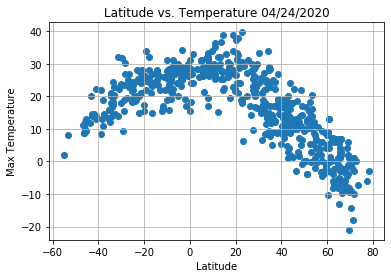

In [97]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Add labels
plt.title("Latitude vs. Temperature 04/24/2020")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("LatitudeVs.TemperaturePlot.png")

# Show plot
plt.show()

This plot looks at whether latitude affects the maximum temperature of the city, and we can see that it does the cities closest to zero having higher temperatures and the temp dropping on either side of 0.  

#### Latitude vs. Humidity Plot

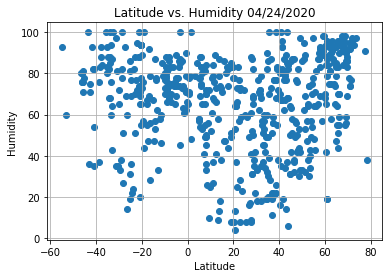

In [98]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

# Add labels
plt.title("Latitude vs. Humidity 04/24/2020")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("LatitudeVs.HumidityPlot.png")

# Show plot
plt.show()

This plot looks at whether latitude affects the humidity of the city, and we can see there is a slight amount of correlation around the 0 latitude there is higher humidity. However, the rest of the data points do not show strong correlation.   

#### Latitude vs. Cloudiness Plot

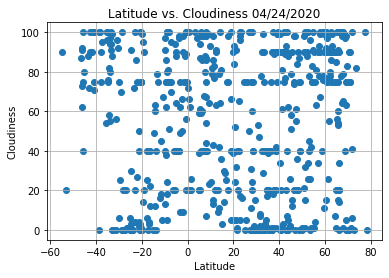

In [99]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Add labels
plt.title("Latitude vs. Cloudiness 04/24/2020")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("LatitudeVs.CloudinessPlot.png")

# Show plot
plt.show()

This plot looks at whether latitude affects the cloudiness of the city, and we can see that it does not because of the non-correlated data points.  

#### Latitude vs. Wind Speed Plot

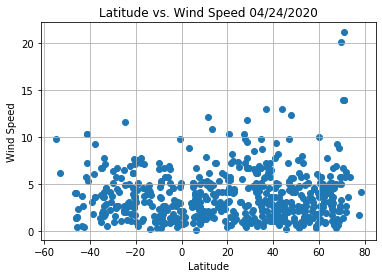

In [100]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

# Add labels
plt.title("Latitude vs. Wind Speed 04/24/2020")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("LatitudeVs.WindSpeedPlot.png")

# Show plot
plt.show()

This plot looks at whether latitude affects the wind speed in a city, and we can see that it does not because the data points are consistent across the graph no matter their latitude.  

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [130]:
# Create Northern Hemisphere DataFrame
northern_df = weather_df.query("Lat >= 0")
northern_df = northern_df.reset_index(drop=True)
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,1,US,1587752341,77,71.29,-156.79,-18.00,5.70
1,Batagay-Alyta,65,RU,1587752341,91,67.80,130.41,-8.05,1.24
2,Ashquelon,2,IL,1587752341,72,31.67,34.57,21.11,8.44
3,Bethel,90,US,1587752342,93,41.37,-73.41,8.33,5.10
4,Husavik,20,IS,1587752342,70,66.04,-17.34,7.00,3.60


In [129]:
#Create Southern Hemisphere DataFrame
southern_df = weather_df.query("Lat <= 0")
southern_df = southern_df.reset_index(drop=True)
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rawson,72,AR,1587752340,36,-43.30,-65.10,20.00,3.67
1,Sumbe,5,AO,1587752341,85,-11.21,13.84,25.87,1.39
2,Atuona,13,PF,1587752341,73,-9.80,-139.03,27.79,7.23
3,Busselton,100,AU,1587752341,76,-33.65,115.33,17.22,7.10
4,Carutapera,88,BR,1587752342,72,-1.20,-46.02,29.12,0.65


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

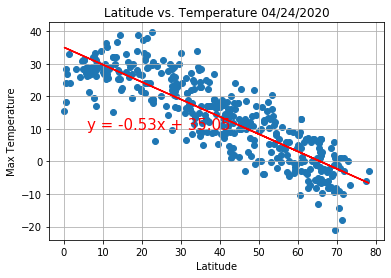

-0.8695090337332584


In [116]:
# Create values
lat = northern_df["Lat"]
temp = northern_df["Max Temp"]

#Linear Regression & Scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Lat"], northern_df["Max Temp"], marker="o")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Add labels
plt.title("Latitude vs. Temperature 04/24/2020")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("NHLatitudeVs.TemperaturePlot.png")

# Show plot
plt.show()
print(rvalue)

This plot looks at whether latitude affects the temperature in the city, and we can see that it does because of the clear corraltion between the closer to 0 the higher the temperature.  

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

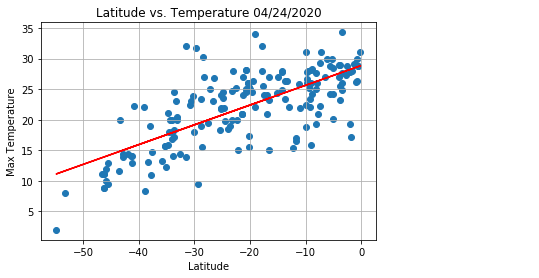

0.7149731069588862


In [115]:
# Create values
lat = southern_df["Lat"]
temp = southern_df["Max Temp"]

#Linear Regression & Scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Lat"], southern_df["Max Temp"], marker="o")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Add labels
plt.title("Latitude vs. Temperature 04/24/2020")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("SHLatitudeVs.TemperaturePlot.png")

# Show plot
plt.show()
print(rvalue)

This plot looks at whether latitude affects the temperature in the city, and we can see that it does because of the clear corraltion between the closer to 0 the higher the temperature.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

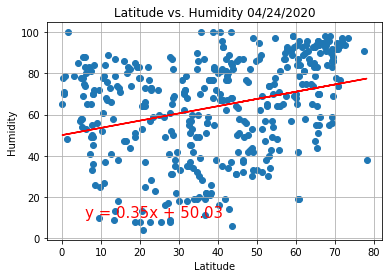

0.29897185829389716


In [117]:
# Create values
lat = northern_df["Lat"]
humidity = northern_df["Humidity"]

#Linear Regression & Scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humidity)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Lat"], northern_df["Humidity"], marker="o")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Add labels
plt.title("Latitude vs. Humidity 04/24/2020")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("NHLatitudeVs.HumidityPlot.png")

# Show plot
plt.show()
print(rvalue)

This plot looks at whether latitude affects the humidity of the city, and we can see there is a slight amount of correlation around with the higher the latitude the higher the humidity.  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

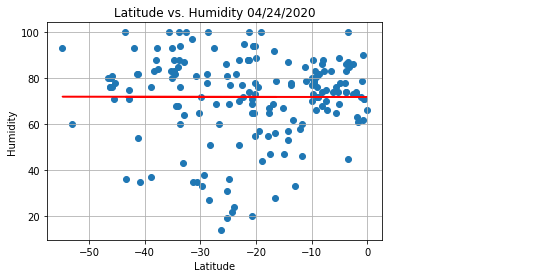

-0.0009784099800816545


In [118]:
# Create values
lat = southern_df["Lat"]
humidity = southern_df["Humidity"]

#Linear Regression & Scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humidity)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Lat"], southern_df["Humidity"], marker="o")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Add labels
plt.title("Latitude vs. Humidity 04/24/2020")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("SHLatitudeVs.HumidityPlot.png")

# Show plot
plt.show()
print(rvalue)

This plot looks at whether latitude affects the humidity of the city, and we can see there is very little correlation between these datapoints. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

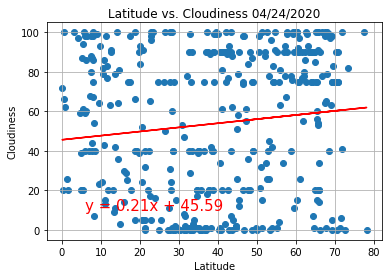

0.11751008170327017


In [119]:
# Create values
lat = northern_df["Lat"]
cloud = northern_df["Cloudiness"]

#Linear Regression & Scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], marker="o")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Add labels
plt.title("Latitude vs. Cloudiness 04/24/2020")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("NHLatitudeVs.CloudinessPlot.png")

# Show plot
plt.show()
print(rvalue)

This plot looks at whether latitude affects the cloudiness of the city, and we can see that it does not because of the non-correlated data points.  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

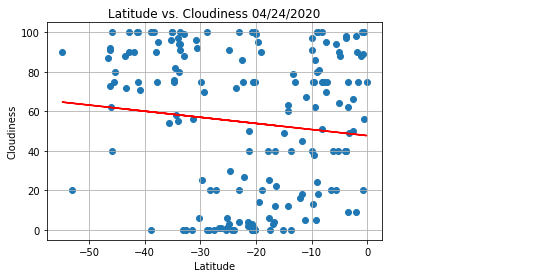

-0.11354279627343908


In [131]:
# Create values
lat = southern_df["Lat"]
cloud = southern_df["Cloudiness"]

#Linear Regression & Scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], marker="o")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Add labels
plt.title("Latitude vs. Cloudiness 04/24/2020")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("SHLatitudeVs.CloudinessPlot.png")

# Show plot
plt.show()
print(rvalue)

This plot looks at whether latitude affects the cloudiness of the city, and we can see there is a slight correlation with the lower the latitude having a higher or absent amount of cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

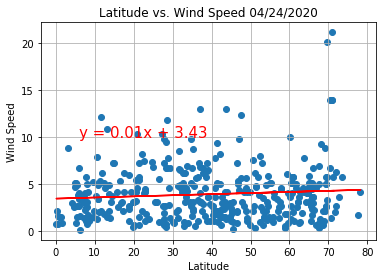

0.08527622356751795


In [121]:
# Create values
lat = northern_df["Lat"]
wind = northern_df["Wind Speed"]

#Linear Regression & Scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"], marker="o")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Add labels
plt.title("Latitude vs. Wind Speed 04/24/2020")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("NHLatitudeVs.WindSpeedPlot.png")

# Show plot
plt.show()
print(rvalue)

This plot looks at whether latitude affects the wind speed in a city, and we can see a small correlation with the increase in latitude bringing slightly higher wind speed.  

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

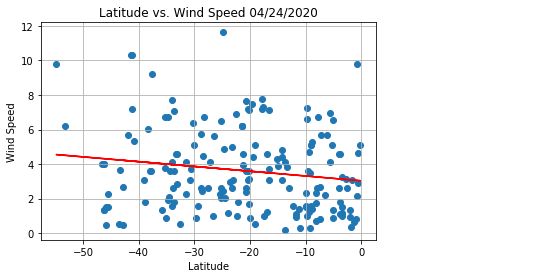

-0.15825913222379911


In [128]:
# Create values
lat = southern_df["Lat"]
wind = southern_df["Wind Speed"]

#Linear Regression & Scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"], marker="o")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Add labels
plt.title("Latitude vs. Wind Speed 04/24/2020")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Create Png
plt.savefig("SHLatitudeVs.WindSpeedPlot.png")

# Show plot
plt.show()
print(rvalue)

This plot looks at whether latitude affects the wind speed in a city, and we can see a correlation with the increase in latitude bringing lower wind speed.  